<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/Group_By.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------Group Data Per city and then Run analytics for each of these groups------------------


SPLIT APPLY COMBINE-
Process of first SPLITTING Data into multiple Groups.. Then APPLYING some analysis on this and then get the aggregated results (COMBINING) as a single data frame for ..




https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Weather_cities.csv']))

Saving Weather_cities.csv to Weather_cities.csv


In [0]:
df

day      city  temperature  windspeed   event
0   01-01-2017  new york           32          6    Rain
1   01-02-2017  new york           36          7   Sunny
2   01-03-2017  new york           28         12    Snow
3   01-04-2017  new york           33          7   Sunny
4   01-01-2017    mumbai           90          5   Sunny
5   01-02-2017    mumbai           85         12     Fog
6   01-03-2017    mumbai           87         15     Fog
7   01-04-2017    mumbai           92          5    Rain
8   01-01-2017     paris           45         20   Sunny
9   01-02-2017     paris           50         13  Cloudy
10  01-03-2017     paris           54          8  Cloudy
11  01-04-2017     paris           42         10  Cloudy

In [0]:
#-----Group the data based on cities-----------
g_obj = df.groupby('city')  # Similar to SQL Groupby.  ----- Ex ---- (Select * from city_Data GROUP BY city).
g_obj                    #It will return DataFrame GroupBy object.

# This will create a dictionary with key as city like paris, new york etc and value will be the Dataframe containing the particular city's data....

-------------We have 3 new groups having 3 city's data-------

In [0]:
#If we want to access each of these groups.
for city, city_df in g_obj:
  print(city)
  print (city_df)

mumbai
          day    city  temperature  windspeed  event
4  01-01-2017  mumbai           90          5  Sunny
5  01-02-2017  mumbai           85         12    Fog
6  01-03-2017  mumbai           87         15    Fog
7  01-04-2017  mumbai           92          5   Rain
new york
          day      city  temperature  windspeed  event
0  01-01-2017  new york           32          6   Rain
1  01-02-2017  new york           36          7  Sunny
2  01-03-2017  new york           28         12   Snow
3  01-04-2017  new york           33          7  Sunny
paris
           day   city  temperature  windspeed   event
8   01-01-2017  paris           45         20   Sunny
9   01-02-2017  paris           50         13  Cloudy
10  01-03-2017  paris           54          8  Cloudy
11  01-04-2017  paris           42         10  Cloudy


In [0]:
#-------------If we want to access a specific DataFrame--------------
g_obj.get_group('paris')

day   city  temperature  windspeed   event
8   01-01-2017  paris           45         20   Sunny
9   01-02-2017  paris           50         13  Cloudy
10  01-03-2017  paris           54          8  Cloudy
11  01-04-2017  paris           42         10  Cloudy

In [0]:
#------------What is the max temp / Windspeed in each of this cities.
g_obj.max()

day  temperature  windspeed  event
city                                               
mumbai    01-04-2017           92         15  Sunny
new york  01-04-2017           36         12  Sunny
paris     01-04-2017           54         20  Sunny

In [0]:
g_obj.mean()

temperature  windspeed
city                            
mumbai          88.50       9.25
new york        32.25       8.00
paris           47.75      12.75

In [0]:
g_obj.describe()    #All analytics in one shot.

temperature                         ... windspeed                   
               count   mean       std   min  ...       25%   50%    75%   max
city                                         ...                             
mumbai           4.0  88.50  3.109126  85.0  ...      5.00   8.5  12.75  15.0
new york         4.0  32.25  3.304038  28.0  ...      6.75   7.0   8.25  12.0
paris            4.0  47.75  5.315073  42.0  ...      9.50  11.5  14.75  20.0

[3 rows x 16 columns]

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

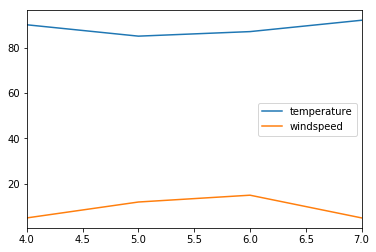

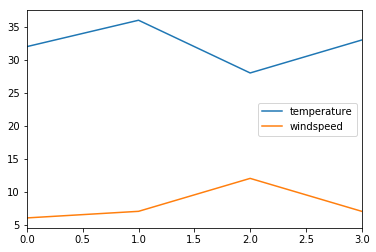

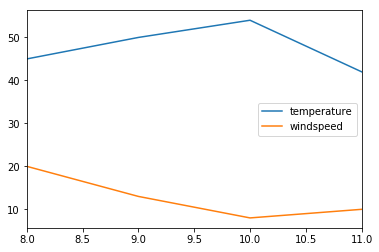

In [0]:
%matplotlib inline    # 3 different plots for temperature and Windspeed for all 3 cities.
g_obj.plot()